# Covid-19 Mask Mandates
## View and compare USA vs Global
## View and compare infection rates by US States with mandate



# Data Sources: data.gov and ourworldindata.org 

 https://catalog.data.gov/dataset/u-s-state-and-territorial-public-mask-mandates-from-april-10-2020-through-january-10-2021--e0ce3

https://catalog.data.gov/dataset/u-s-state-and-territorial-public-mask-mandates-from-april-10-2020-through-january-10-2021--e0ce3

 https://ourworldindata.org/covid-face-coverings

# Steps
1. Get mask mandate data for US country
2. Dates should be from May2020 to Dec2021
3. Group mask mandates by US states by month

In [1]:
# Dependencies
import csv
import os
import numpy as np
import requests
import pandas as pd
import gmaps
import matplotlib.pyplot as plt
import datetime
import time



In [2]:
# Study data file from Our World in Data website for face covering policies
file_to_load = "Resources/face-covering-policies-covid.csv"

# Read the coverings data and study results
face_coverings_df = pd.read_csv(file_to_load)
# face_coverings_df


In [3]:
# Get US data only

us_face_coverings_df = face_coverings_df.loc[face_coverings_df["Entity"] == "United States", :]
us_face_coverings_df

,Entity,Code,Day,facial_coverings
132258,United States,USA,1/1/2020,0
132259,United States,USA,1/2/2020,0
132260,United States,USA,1/3/2020,0
132261,United States,USA,1/4/2020,0
132262,United States,USA,1/5/2020,0
...,...,...,...,...
133016,United States,USA,1/28/2022,2
133017,United States,USA,1/29/2022,2
133018,United States,USA,1/30/2022,2
133019,United States,USA,1/31/2022,2


In [4]:
# Find data types

us_face_coverings_df.dtypes

Entity              object
Code                object
Day                 object
facial_coverings     int64
dtype: object

In [5]:
# Format Date column

#us_face_coverings_df["Day"] = pd.to_datetime(us_face_coverings_df["Day"], format ='%Y%m%d')
#countries_6_variants_df['date'] = pd.to_datetime(countries_6_variants_df.date)


In [6]:
# Specify date range of 01/01/2020 to 12/31/2021

begin_date = "1/1/2020"
end_date = "12/31/2021"

new_maskdata_df = us_face_coverings_df.loc[(us_face_coverings_df['Day'] >=begin_date) & (us_face_coverings_df['Day'] >=end_date)]
new_maskdata_df.head(-10)
                                            

,Entity,Code,Day,facial_coverings
132289,United States,USA,2/1/2020,0
132290,United States,USA,2/2/2020,0
132291,United States,USA,2/3/2020,0
132292,United States,USA,2/4/2020,0
132293,United States,USA,2/5/2020,0
...,...,...,...,...
132890,United States,USA,9/24/2021,3
132891,United States,USA,9/25/2021,3
132892,United States,USA,9/26/2021,3
132893,United States,USA,9/27/2021,3


In [7]:
# Study MASK MANDATE data file from Data.gov US state website
file_to_load = "Resources/US_Public_Mask_Mandates_2020_04_2021_08.csv"

# Read the data for US State Mask Mandates
us_state_mask_df = pd.read_csv(file_to_load)
us_state_mask_df.head()


,State_Tribe_Territory,FIPS_State,FIPS_County,date,order_code
0,AL,1,1,4/10/2020,2
1,AL,1,1,4/11/2020,2
2,AL,1,1,4/12/2020,2
3,AL,1,1,4/13/2020,2
4,AL,1,1,4/14/2020,2


In [8]:
# filter by state, date and order code
filtered_mask_data_df = us_state_mask_df[["date", "State_Tribe_Territory", "order_code"]]
filtered_mask_data_df.head()


,date,State_Tribe_Territory,order_code
0,4/10/2020,AL,2
1,4/11/2020,AL,2
2,4/12/2020,AL,2
3,4/13/2020,AL,2
4,4/14/2020,AL,2


In [9]:
# Formatted the date type from string to datetime
filtered_mask_data_df["date"] = pd.to_datetime(filtered_mask_data_df["date"])
filtered_mask_data_df.head()

<ipython-input-9-349cc67f5866>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mask_data_df["date"] = pd.to_datetime(filtered_mask_data_df["date"])


,date,State_Tribe_Territory,order_code
0,2020-04-10,AL,2
1,2020-04-11,AL,2
2,2020-04-12,AL,2
3,2020-04-13,AL,2
4,2020-04-14,AL,2


In [10]:
# Group data by month -----> ******** order code should NOT be summed ************
group_month_state_df = filtered_mask_data_df.groupby(["State_Tribe_Territory", pd.Grouper(key="date", freq="MS")]).sum()
group_month_state_df

order_code
State_Tribe_Territory date                  
AK                    2020-04-01        1218
                      2020-05-01        1798
                      2020-06-01        1740
                      2020-07-01        1798
                      2020-08-01        1798
...                                      ...
WY                    2020-08-01        1426
                      2020-09-01        1380
                      2020-10-01        1426
                      2020-11-01        1380
                      2020-12-01        1426

[632 rows x 1 columns]

In [11]:
# Get state mask data only from Data.gov website
# us_state_mask_df[us_state_mask_df["State_Tribe_Territory"] == "GA"]

# data frame
bystate_masks_df = us_state_mask_df.loc[us_state_mask_df["State_Tribe_Territory"] == "GA", :]
# bystate_masks_df

In [12]:
# Create charts for COVID CASES data by month and year

# x_axis = np.arange(len(group_month_state_df))
# tick_locations = [value for value in x_axis]

# plt.figure(figsize=(20,3))
# plt.bar(x_axis,group_month_state_df[""] )



In [13]:
# Study CASES data file from Data.gov website
file_to_load = "Resources/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv"

# Read the data for US State Mask Mandates
us_state_cases_df = pd.read_csv(file_to_load)
us_state_cases_df.head()


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
1,09/01/2021,ND,118491,107475.0,11016.0,536,66.0,1562,NaN,NaN,1,0.0,09/02/2021 01:49:05 PM,Agree,Not agree
2,08/08/2021,MD,473969,NaN,NaN,853,0.0,9881,9660.0,221.0,6,1.0,08/10/2021 12:00:00 AM,NaN,Agree
3,05/13/2020,VT,855,NaN,NaN,2,0.0,52,NaN,NaN,0,0.0,05/15/2020 12:00:00 AM,Not agree,Not agree
4,02/02/2021,IL,1130917,1130917.0,0.0,2304,0.0,21336,19306.0,2030.0,63,16.0,02/03/2021 02:55:58 PM,Agree,Agree


In [14]:
# filter by state, date and total cases
filtered_data_df = us_state_cases_df[["submission_date", "state", "tot_cases"]]
# filtered_data_df

In [15]:
# formatted the date type from string to datetime
filtered_data_df["submission_date"] = pd.to_datetime(filtered_data_df["submission_date"])
filtered_data_df

# filtered_data_df.groupby(pd.Grouper(key="submission_date", freq="MS")).sum()

<ipython-input-15-a777181cd8f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_df["submission_date"] = pd.to_datetime(filtered_data_df["submission_date"])


,submission_date,state,tot_cases
0,2021-12-01,ND,163565
1,2021-09-01,ND,118491
2,2021-08-08,MD,473969
3,2020-05-13,VT,855
4,2021-02-02,IL,1130917
...,...,...,...
44695,2021-02-10,FSM,1
44696,2020-07-02,RI,16859
44697,2022-01-12,WY,123743
44698,2021-11-27,SC,917579


In [16]:
# Group dates into months
# group_by_state_df.groupby(["state", "submission_date"]).count()
# group_by_state_df

group_by_state_df = filtered_data_df.groupby(["state", pd.Grouper(key="submission_date", freq="MS")]).sum()

group_by_state_df

tot_cases
state submission_date           
AK    2020-01-01               0
      2020-02-01               0
      2020-03-01             793
      2020-04-01            8290
      2020-05-01           12268
...                          ...
WY    2021-10-01         3016840
      2021-11-01         3236327
      2021-12-01         3515362
      2022-01-01         4004880
      2022-02-01          594655

[1560 rows x 1 columns]

In [31]:
#specifice states
group_by_state_df.loc["CA"]
# group_by_state_df.loc["AK"].loc["2021-01-01"]

,tot_cases
submission_date,
2020-01-01,0
2020-02-01,387
2020-03-01,48716
2020-04-01,807361
2020-05-01,2405199
2020-06-01,4755668
2020-07-01,11151378
2020-08-01,18894736
2020-09-01,22856989


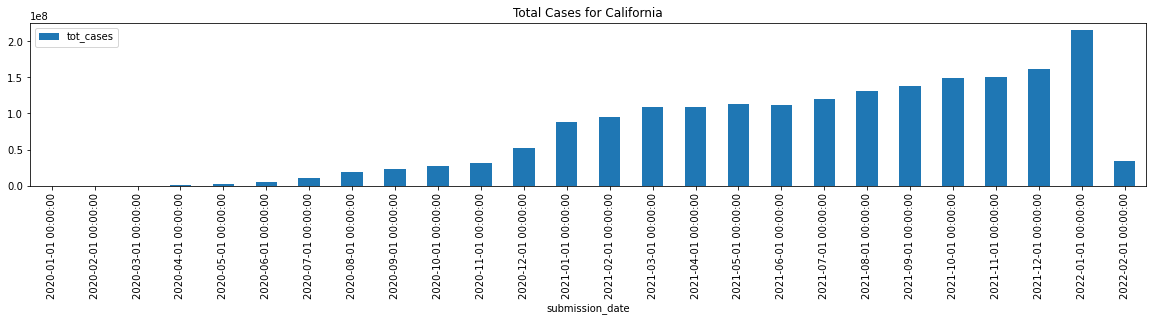

<Figure size 432x288 with 0 Axes>

In [27]:
# Create charts of covid cases for US states NY, CA, GA and OH 

group_by_state_df.loc["CA"].plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Total Cases for California")

plt.show()
plt.tight_layout()

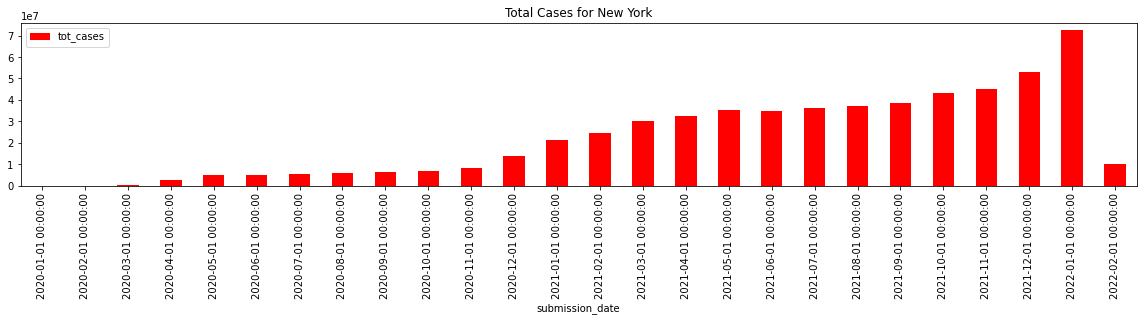

<Figure size 432x288 with 0 Axes>

In [28]:
# Create charts of covid cases for US states NY, CA, GA and OH 

group_by_state_df.loc["NY"].plot(kind="bar", color='r', figsize=(20,3))

# Set a title for the chart
plt.title("Total Cases for New York")

plt.show()
plt.tight_layout()

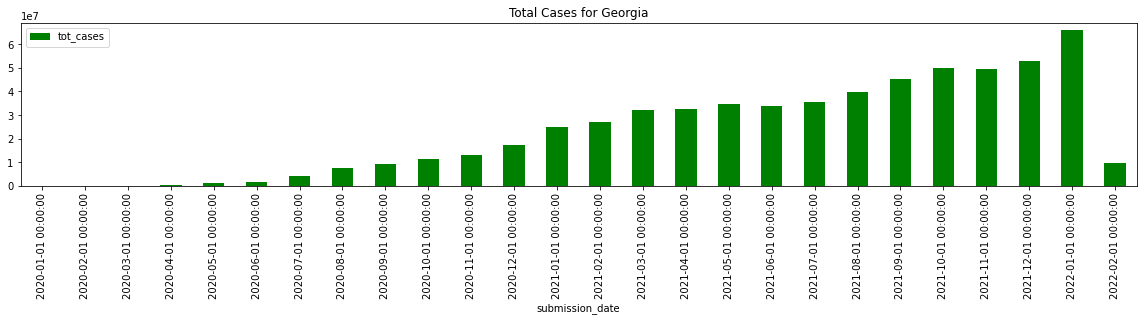

<Figure size 432x288 with 0 Axes>

In [29]:
# Create charts of covid cases for US states NY, CA, GA and OH 

group_by_state_df.loc["GA"].plot(kind="bar", color='g', figsize=(20,3))

# Set a title for the chart
plt.title("Total Cases for Georgia")

plt.show()
plt.tight_layout()

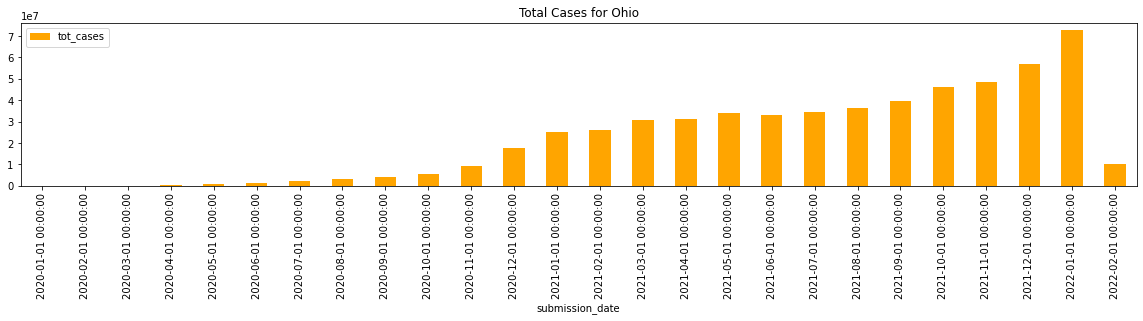

<Figure size 432x288 with 0 Axes>

In [30]:
# Create charts of covid cases for US states NY, CA, GA and OH 

group_by_state_df.loc["OH"].plot(kind="bar", color='orange', figsize=(20,3))

# Set a title for the chart
plt.title("Total Cases for Ohio")

plt.show()
plt.tight_layout()

In [ ]:
group_by_state_df.groupby(["state", "submission_date"]).count()
group_by_state_df

In [ ]:
# Rename submission date to just date in order to compare mask data to covid cases data

# rename_date_df = group_by_state_df.rename(columns={"submission_date": "date"})
# rename_date_df

In [ ]:
# Create charts for covid cases data by month and year

# group_by_state_df.index.values

# x_axis = np.arange(len(group_by_state_df))
# tick_locations = [value for value in x_axis]

# plt.figure(figsize=(20,3))
# plt.bar(x_axis, group_by_state_df["tot_cases"], color="r", alpha=0.5, align="center")
# plt.xticks(tick_locations, group_by_state_df["state"], rotation="vertical")
